In [31]:
import cv2

In [32]:
vc = cv2.VideoCapture(r"G:\AI\code\biliLangChain\cv\test.mp4")

VideoCapture可以捕获摄像头，用数字可以空中不同的设备，比如0和1
视频文件直接指定位置就可以

In [33]:
# 检查是否可以打开
if vc.isOpened(): 
    open, frame = vc.read()
else:
    open = False

In [34]:
open

True

In [35]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gary = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)# 轉化成灰度的图片，
        cv2.imshow("Gary", gary)
        if cv2.waitKey(10) & 0xFF == 27: # esc退出 
            break
vc.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

# 截取部分图像数据(ROI区域)

In [4]:
import cv2
img = cv2.imread(r"G:\AI\code\biliLangChain\cv\mycat.jpg")
cat = img[200:600,200:800]
cv2.imshow("cat", cat)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 颜色通道提取

In [6]:
b,g,r = cv2.split(cat)

In [7]:
b

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [250, 250, 250, ..., 249, 249, 249],
       [251, 251, 251, ..., 250, 250, 250],
       [251, 251, 251, ..., 250, 250, 250]], dtype=uint8)

In [8]:
b.shape

(373, 600)

In [10]:
img = cv2.merge((b,g,r))
img.shape

(373, 600, 3)

In [11]:
# 只保留R,将其他通道置位0就可以了
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv2.imshow("cat", cur_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv2.imshow("cat", cur_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv2.imshow("cat", cur_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 边界填充

In [15]:
import cv2

# 读取图像（确保路径正确）
img = cv2.imread('mycat.jpg')

# 边界宽度
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)

# 不同边界类型
replicate = cv2.copyMakeBorder(img,
                                 top_size, bottom_size, left_size, right_size,
                                 cv2.BORDER_REPLICATE)

reflect = cv2.copyMakeBorder(img,
                               top_size, bottom_size, left_size, right_size,
                               cv2.BORDER_REFLECT)

reflect101 = cv2.copyMakeBorder(img,
                                  top_size, bottom_size, left_size, right_size,
                                  cv2.BORDER_REFLECT_101)

wrap = cv2.copyMakeBorder(img,
                          top_size, bottom_size, left_size, right_size,
                          cv2.BORDER_WRAP)

constant = cv2.copyMakeBorder(img,top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT,value=0)   # 黑色填充

# 保存或显示结果（示例：显示 constant）
cv2.imshow('constant', constant)
cv2.waitKey(0)
cv2.destroyAllWindows()

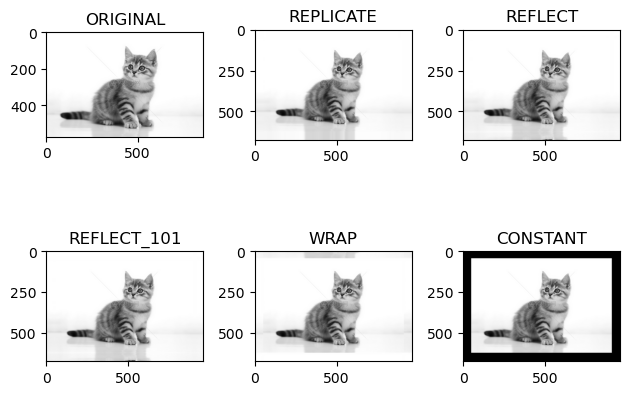

In [16]:
import matplotlib.pyplot as plt
import cv2

# 假设 img / replicate / reflect / reflect101 / wrap / constant 已准备好
plt.subplot(231), plt.imshow(img,     'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate,'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101,'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap,    'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant,'gray'), plt.title('CONSTANT')

plt.tight_layout()   # 自动调整间距
plt.show()

# 数值计算

In [17]:
img_cat = cv2.imread(r"G:\AI\code\biliLangChain\cv\mycat.jpg")
img_cat2 = img_cat.copy()


In [19]:
img_cat = img_cat + 10 # 在每个像素点上都加上10

In [20]:
img_cat + img_cat[:5,:,0]

ValueError: operands could not be broadcast together with shapes (573,860,3) (5,860) 

In [ ]:
cv2.add(img_cat, img_cat2)[:5,:,0]

# 图像融合

In [26]:
img_cat = cv2.imread(r"G:\AI\code\biliLangChain\cv\mycat.jpg")
img_dog = cv2.imread(r"G:\AI\code\biliLangChain\cv\img_dog.jpg")

In [27]:
# 融合前保证图像的大小是一致的
img_cat = cv2.resize(img_cat,(500,500))
img_dog = cv2.resize(img_dog,(500,500))
img_cat.shape

(500, 500, 3)

In [29]:
# 图像融合
res  = cv2.addWeighted(img_cat,0.8,img_dog,0.4,0) # 权重和偏置

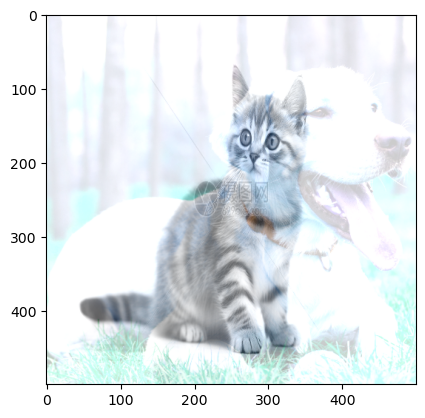

In [31]:
plt.imshow(res)